In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

import mplfinance as mpf

import pandas_datareader as pdr
import statsmodels.api as sm
import scipy.stats as scs


from datetime import date

today= date.today()
today, today.strftime('%Y-%m-%d')

(datetime.date(2021, 5, 12), '2021-05-12')

In [2]:
#stock= ['SPY', 'GLD', 'SPLB', 'EEM', 'QQQ', 'SLV', 'HYG', 'VWO', 'TLT', 'FXI']
#stock= ['VTI', 'VEU', 'VNQ', 'BND', 'GSG']

stock=       '^GSPC'    #['^GSPC']
sampling=    'daily'    #['daily',    'weekly'][0]
aggregation= 'last_day' #['last_day', 'mean'][0]


date_start= '1980-01-01'
date_end=   today.strftime("%Y-%m-%d")

date_start, date_end

('1980-01-01', '2021-05-12')

In [3]:
dfX= pdr.DataReader(stock,        #'^GSPC', #'SPY', 
                   start=        date_start, 
                   #end=         date_end, 
                   data_source= 'yahoo')
dfX

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1979-12-31,108.529999,107.260002,0.000000,107.940002,31530000,107.940002
1980-01-02,108.430000,105.290001,0.000000,105.760002,40610000,105.760002
1980-01-03,106.080002,103.260002,0.000000,105.220001,50480000,105.220001
1980-01-04,107.080002,105.089996,0.000000,106.519997,39130000,106.519997
1980-01-07,107.800003,105.800003,0.000000,106.809998,44500000,106.809998
...,...,...,...,...,...,...
2021-05-05,4187.720215,4160.939941,4177.060059,4167.589844,4029050000,4167.589844
2021-05-06,4202.700195,4147.330078,4169.140137,4201.620117,4504860000,4201.620117
2021-05-07,4238.040039,4201.640137,4210.339844,4232.600098,4013060000,4232.600098


In [4]:
import yfinance as yf

dfY=   yf.Ticker(stock).history( start= date_start)
dfY

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1979-12-31,0.000000,108.529999,107.260002,107.940002,31530000,0,0
1980-01-02,0.000000,108.430000,105.290001,105.760002,40610000,0,0
1980-01-03,0.000000,106.080002,103.260002,105.220001,50480000,0,0
1980-01-04,0.000000,107.080002,105.089996,106.519997,39130000,0,0
1980-01-07,0.000000,107.800003,105.800003,106.809998,44500000,0,0
...,...,...,...,...,...,...,...
2021-05-05,4177.060059,4187.720215,4160.939941,4167.589844,4029050000,0,0
2021-05-06,4169.140137,4202.700195,4147.330078,4201.620117,4504860000,0,0
2021-05-07,4210.339844,4238.040039,4201.640137,4232.600098,4013060000,0,0


In [70]:
X= dfX[['Close']]
X

,Close
Date,
1979-12-31,107.940002
1980-01-02,105.760002
1980-01-03,105.220001
1980-01-04,106.519997
1980-01-07,106.809998
...,...
2021-05-05,4167.589844
2021-05-06,4201.620117
2021-05-07,4232.600098


<AxesSubplot:xlabel='Date'>

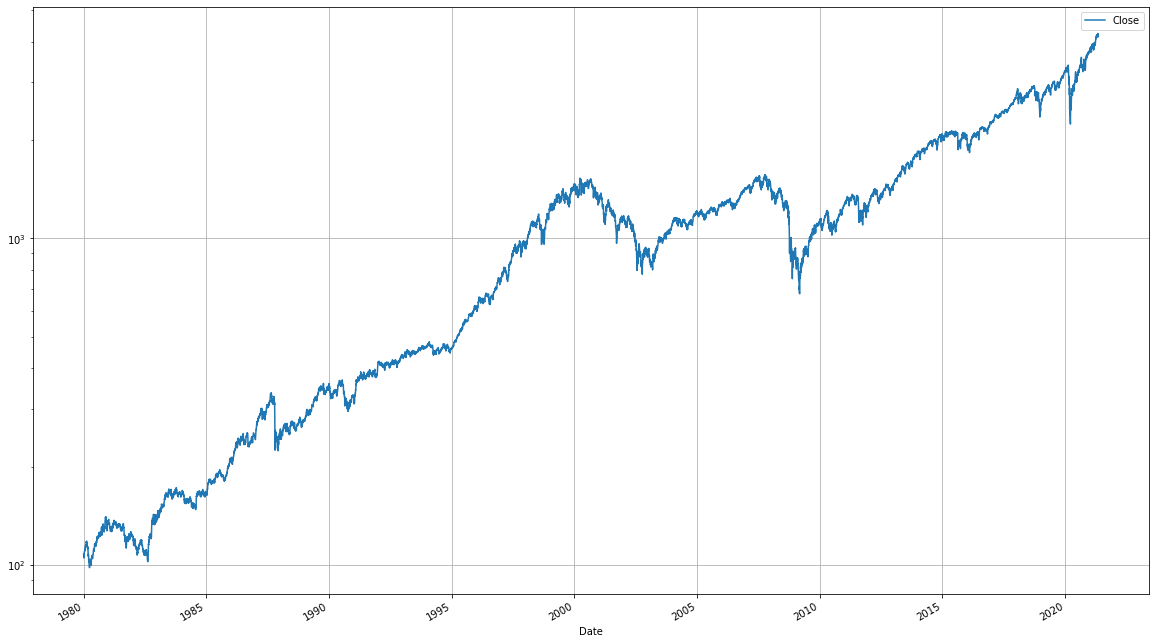

In [71]:
X.plot(
    figsize= (20, 12),
    logy=    True,
    grid=    True
    )


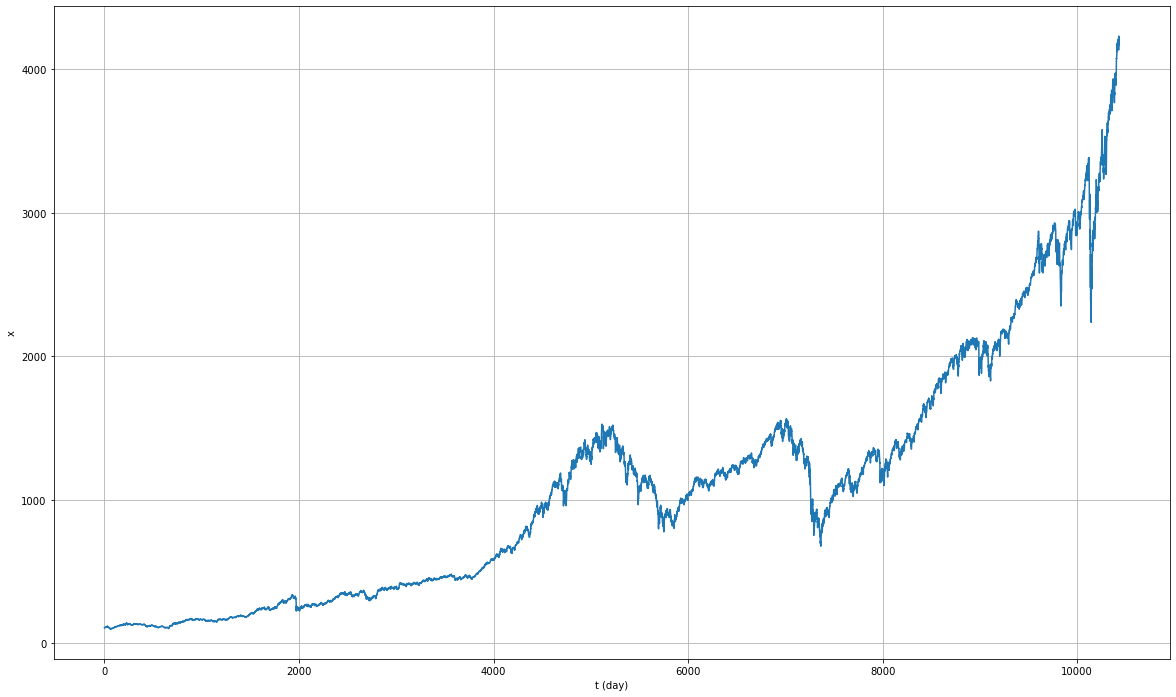

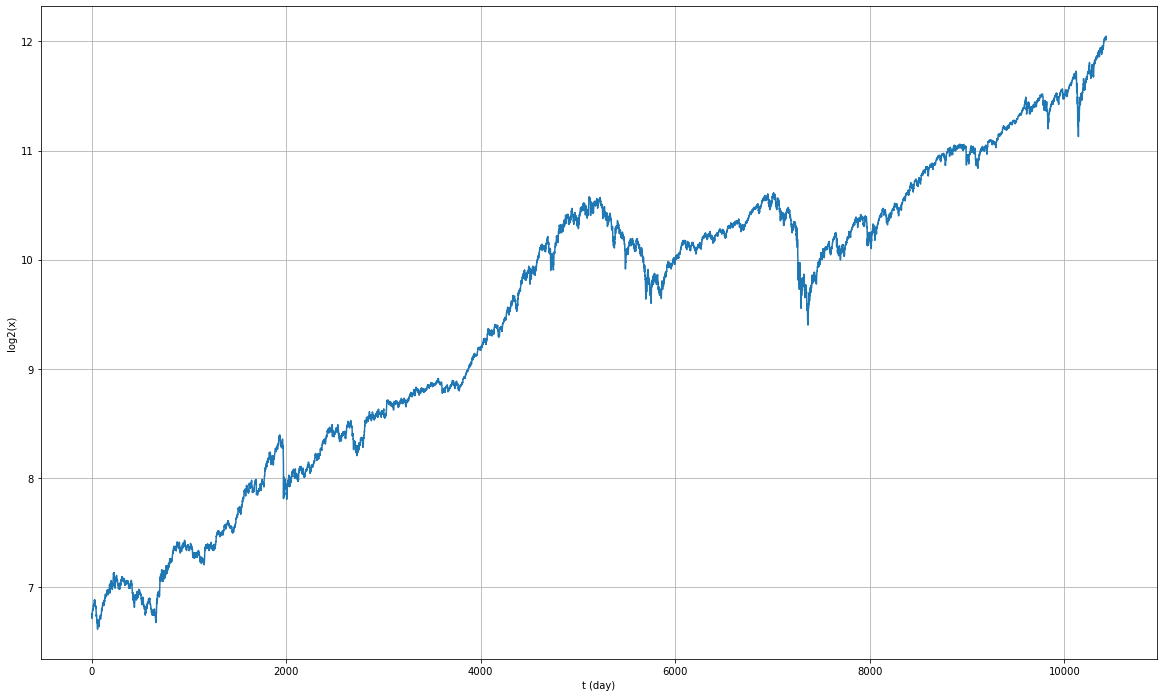

In [161]:
x= X['Close'].values
lx= np.log2(x)

import matplotlib.pyplot as pl

pl.figure(figsize=(20,12))
pl.plot(x) 
pl.xlabel('t (day)')
pl.ylabel('x')
pl.grid()

pl.figure(figsize=(20,12))
pl.plot(lx)
pl.xlabel('t (day)')
pl.ylabel('log2(x)')
pl.grid()


In [164]:
sx= pd.Series(lx)
sx

0         6.754086
1         6.724650
2         6.717265
3         6.734980
4         6.738903
           ...    
10425    12.024998
10426    12.036730
10427    12.047328
10428    12.032194
10429    12.015509
Length: 10430, dtype: float64

<AxesSubplot:>

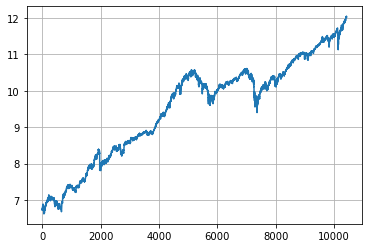

In [166]:
sx.plot(grid=True)

<AxesSubplot:>

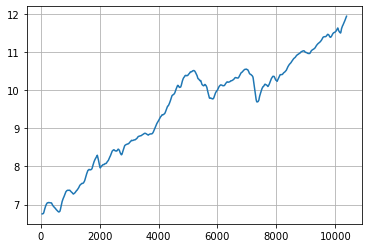

In [169]:
sx100= sx.rolling(window=100, center=True).mean()
sx100.plot(grid=True)

<AxesSubplot:>

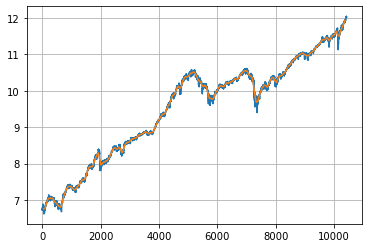

In [170]:
sx.plot(grid=True)
sx100.plot(grid=True)


<AxesSubplot:>

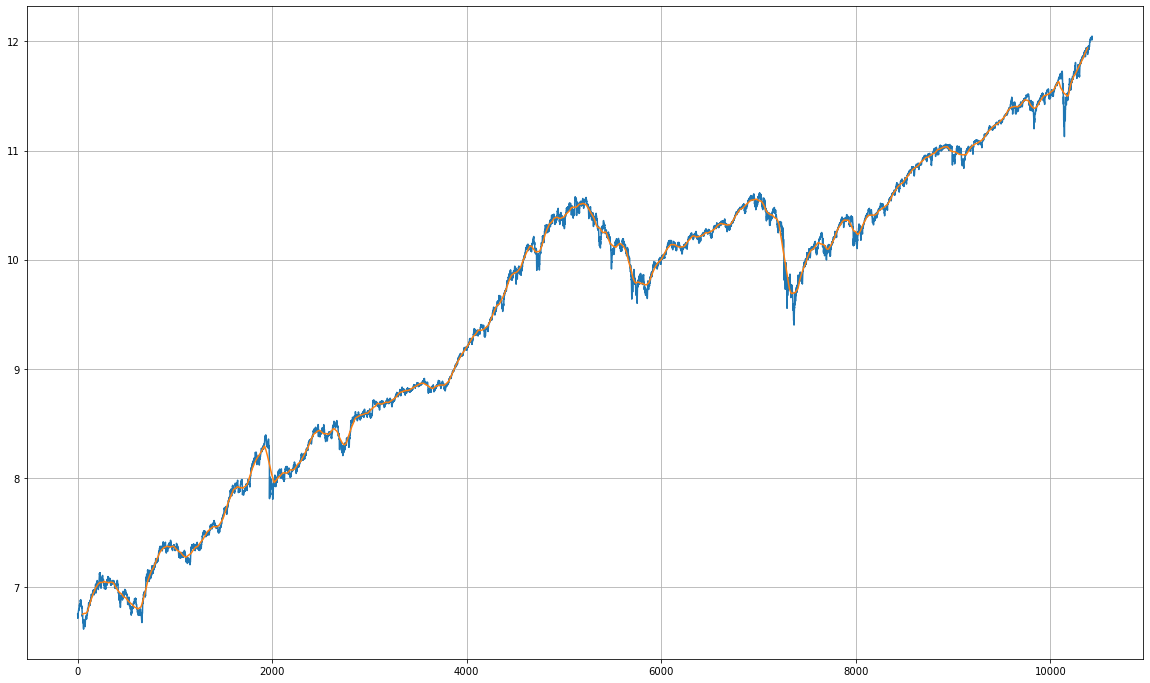

In [175]:
pl.figure(figsize=(20,12))
sx.plot(grid=True)
sx100.plot(grid=True)

<AxesSubplot:>

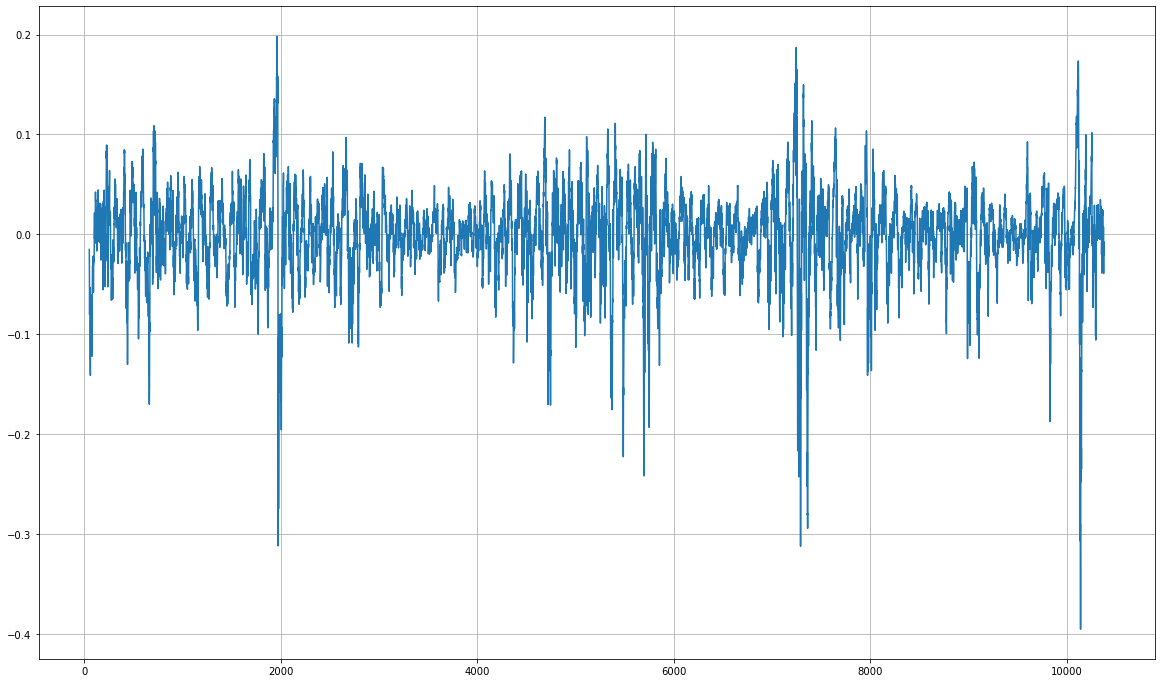

In [176]:
dsx= sx-sx100

pl.figure(figsize=(20,12))
dsx.plot(grid=True)


<AxesSubplot:>

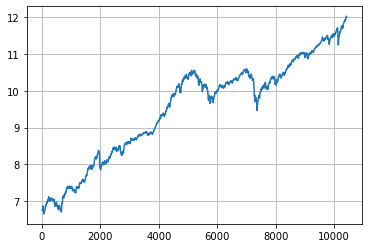

In [177]:
sx10= sx.rolling(window=10, center=True).mean()
sx10.plot(grid=True)

<AxesSubplot:>

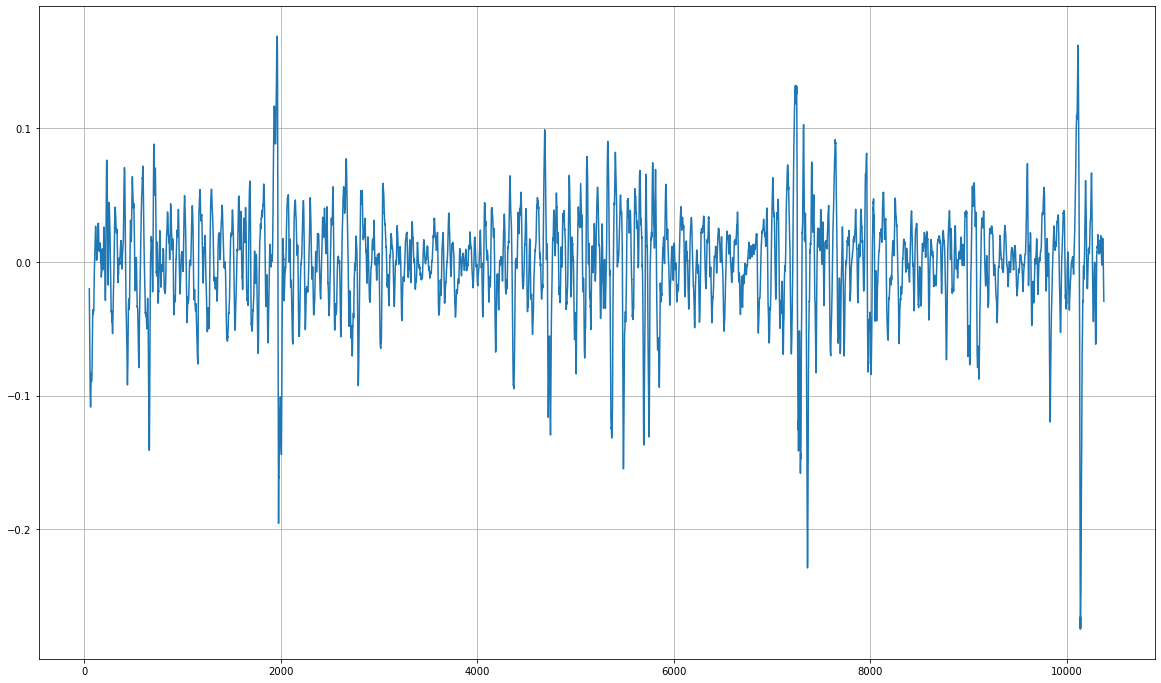

In [178]:
dsx= sx10-sx100

pl.figure(figsize=(20,12))
dsx.plot(grid=True)


<AxesSubplot:>

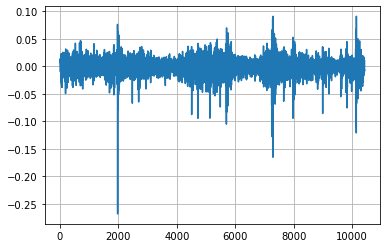

In [181]:
d1_10=   sx-sx10
d10_100= sx10-sx100

d1_10.plot(grid=True)

<AxesSubplot:>

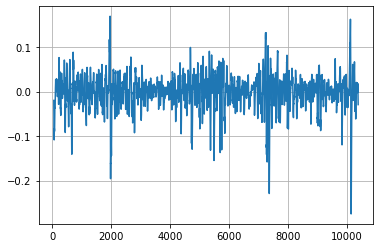

In [182]:
d10_100.plot(grid=True)

<AxesSubplot:>

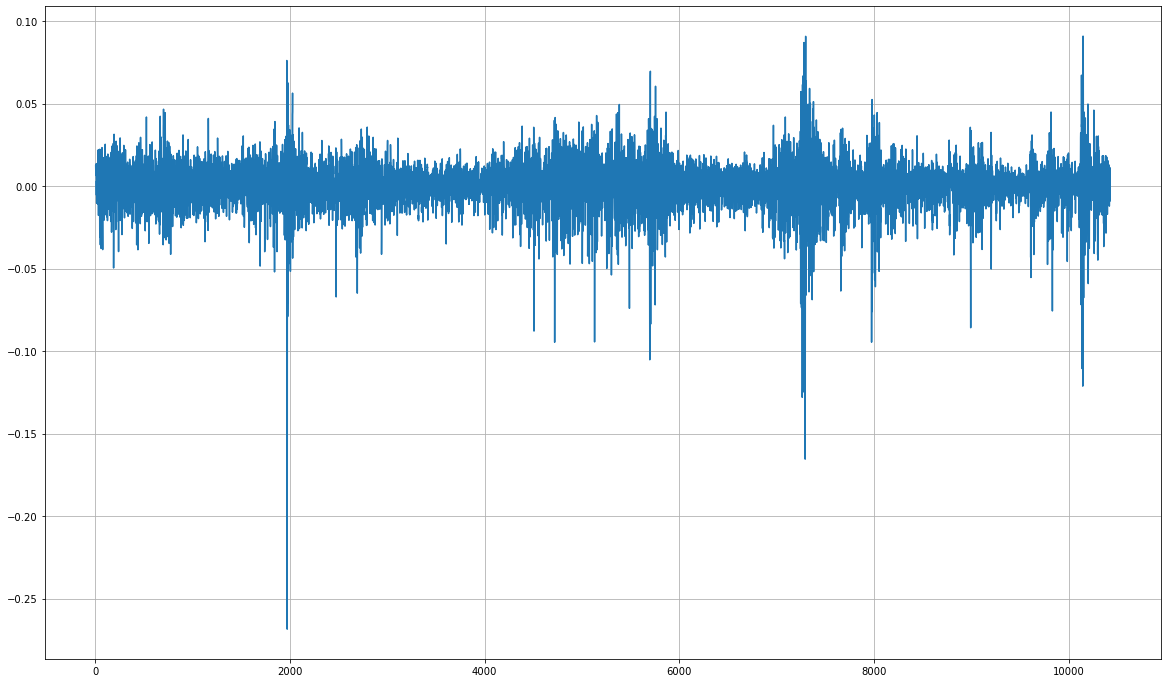

In [186]:
pl.figure(figsize=(20,12))

d1_10.plot(grid=True)

<AxesSubplot:>

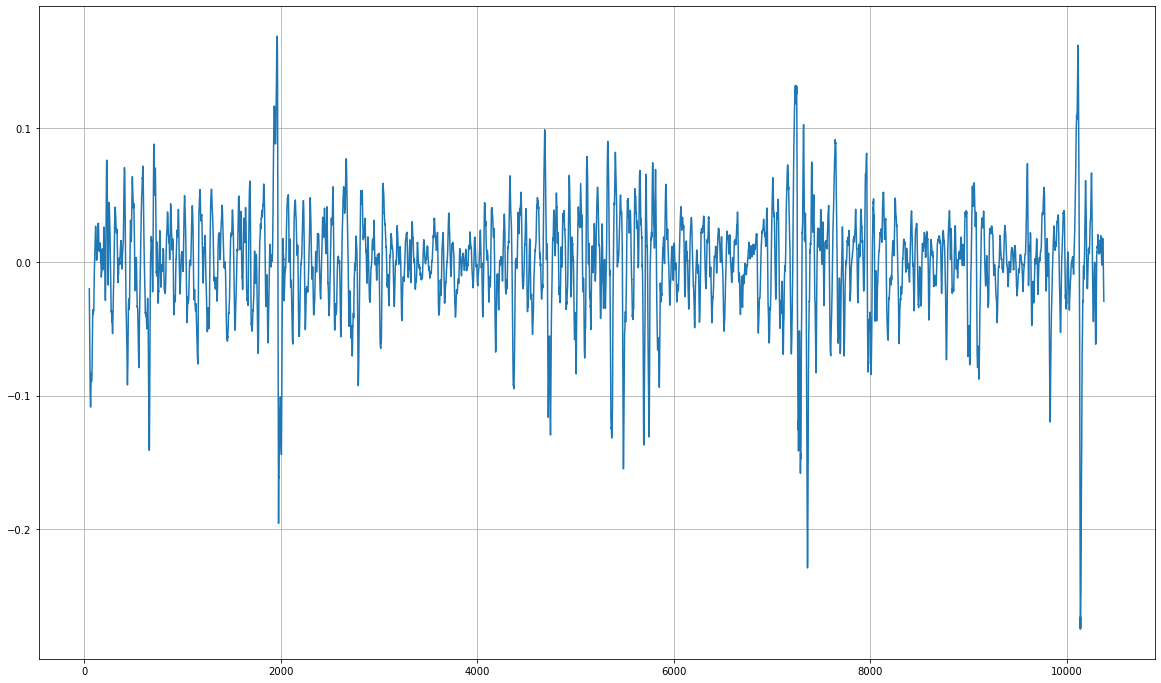

In [187]:
pl.figure(figsize=(20,12))
d10_100.plot(grid=True)

In [191]:
import plotly.express as px

fig= px.line(y= d10_100)

fig.update_xaxes(title_text='x')
fig.update_yaxes(title_text='y')

fig.show()

In [192]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(
    mode = "lines+markers",
    y = [4, 1, 3],
    x = ["December", "January", "February"]))

fig.update_xaxes(
        tickangle = 90,
        title_text = "Month",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "Temperature",
        title_standoff = 25)

fig.show()

In [194]:
import plotly.graph_objects as go

fig= go.Figure()
fig.update_xaxes()
fig.update_yaxes()
fig.show()

In [207]:

import numpy as np
import librosa as lr


lr.zero_crossings(d10_100.values)

array([ True, False, False, ..., False, False, False])

In [211]:
qqq= d10_100.dropna()
lr.zero_crossings(qqq.values)

array([ True, False, False, ..., False, False, False])

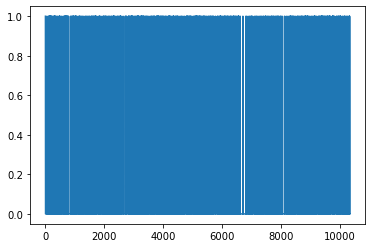

In [212]:
pl.plot(_)

In [128]:
Y1= np.fft.fft(y1, n=16)
Y10= np.fft.fft(y10, n=16)
Y11= np.fft.fft(y1-y10, n=16)

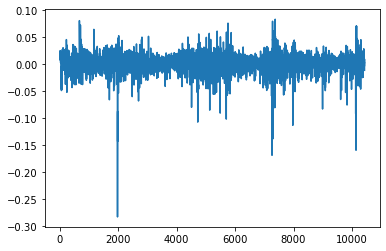

In [130]:
y11= y1-y10

pl.plot(y11)


In [7]:
logReturn=    np.log( X['Close'] / X['Close'].shift(1) )
logReturn

Date
1979-12-31         NaN
1980-01-02   -0.020403
1980-01-03   -0.005119
1980-01-04    0.012279
1980-01-07    0.002719
                ...   
2021-05-05    0.000703
2021-05-06    0.008132
2021-05-07    0.007346
2021-05-10   -0.010490
2021-05-11   -0.011565
Name: Close, Length: 10430, dtype: float64

In [8]:
X['logReturn']= logReturn
X

<ipython-input-8-23d8f5e6bbae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['logReturn']= logReturn


,Close,logReturn
Date,,
1979-12-31,107.940002,NaN
1980-01-02,105.760002,-0.020403
1980-01-03,105.220001,-0.005119
1980-01-04,106.519997,0.012279
1980-01-07,106.809998,0.002719
...,...,...
2021-05-05,4167.589844,0.000703
2021-05-06,4201.620117,0.008132
2021-05-07,4232.600098,0.007346


In [9]:
X['upDown']= np.where(X['logReturn'] > 0, 1, -1)

X.dropna(inplace=True)

X

<ipython-input-9-361345787e57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['upDown']= np.where(X['logReturn'] > 0, 1, -1)
<ipython-input-9-361345787e57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


,Close,logReturn,upDown
Date,,,
1980-01-02,105.760002,-0.020403,-1
1980-01-03,105.220001,-0.005119,-1
1980-01-04,106.519997,0.012279,1
1980-01-07,106.809998,0.002719,1
1980-01-08,108.949997,0.019838,1
...,...,...,...
2021-05-05,4167.589844,0.000703,1
2021-05-06,4201.620117,0.008132,1
2021-05-07,4232.600098,0.007346,1


<AxesSubplot:>

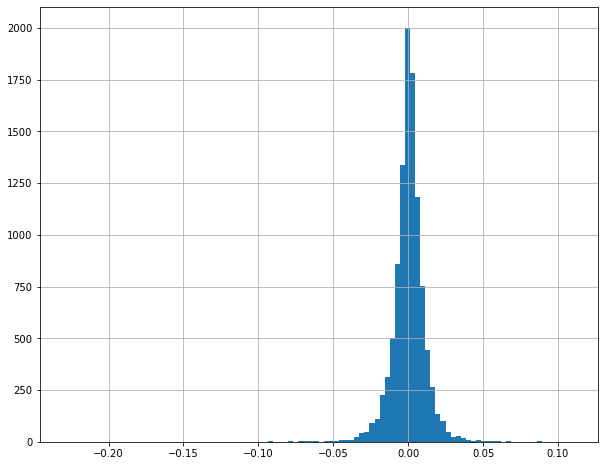

In [10]:
X['logReturn'].hist(bins= 100, figsize=(10, 8))

# Feature Engineering

In [11]:
lags= 5
cols= []
for lag in range(1, lags + 1):
    col= f'timeShift{lag}'
    X[col]= X['logReturn'].shift(lag)
    cols += [col]
X.dropna(inplace= True)
X

<ipython-input-11-64fefca55856>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]= X['logReturn'].shift(lag)
<ipython-input-11-64fefca55856>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace= True)


,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5
Date,,,,,,,,
1980-01-09,109.050003,0.000917,1,0.019838,0.002719,0.012279,-0.005119,-0.020403
1980-01-10,109.889999,0.007673,1,0.000917,0.019838,0.002719,0.012279,-0.005119
1980-01-11,109.919998,0.000273,1,0.007673,0.000917,0.019838,0.002719,0.012279
1980-01-14,110.379997,0.004176,1,0.000273,0.007673,0.000917,0.019838,0.002719
1980-01-15,111.139999,0.006862,1,0.004176,0.000273,0.007673,0.000917,0.019838
...,...,...,...,...,...,...,...,...
2021-05-05,4167.589844,0.000703,1,-0.006701,0.002744,-0.007221,0.006740,-0.000846
2021-05-06,4201.620117,0.008132,1,0.000703,-0.006701,0.002744,-0.007221,0.006740
2021-05-07,4232.600098,0.007346,1,0.008132,0.000703,-0.006701,0.002744,-0.007221


In [12]:
X

,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5
Date,,,,,,,,
1980-01-09,109.050003,0.000917,1,0.019838,0.002719,0.012279,-0.005119,-0.020403
1980-01-10,109.889999,0.007673,1,0.000917,0.019838,0.002719,0.012279,-0.005119
1980-01-11,109.919998,0.000273,1,0.007673,0.000917,0.019838,0.002719,0.012279
1980-01-14,110.379997,0.004176,1,0.000273,0.007673,0.000917,0.019838,0.002719
1980-01-15,111.139999,0.006862,1,0.004176,0.000273,0.007673,0.000917,0.019838
...,...,...,...,...,...,...,...,...
2021-05-05,4167.589844,0.000703,1,-0.006701,0.002744,-0.007221,0.006740,-0.000846
2021-05-06,4201.620117,0.008132,1,0.000703,-0.006701,0.002744,-0.007221,0.006740
2021-05-07,4232.600098,0.007346,1,0.008132,0.000703,-0.006701,0.002744,-0.007221


In [13]:
import ta
from ta.volatility import BollingerBands

In [14]:
indicator_bb= BollingerBands(close=      X['Close'], 
                             window=     20, 
                             window_dev= 2)
X['bbM']= indicator_bb.bollinger_mavg()
X['bbH']= indicator_bb.bollinger_hband()
X['bbL']= indicator_bb.bollinger_lband()

X

<ipython-input-14-e284028967bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bbM']= indicator_bb.bollinger_mavg()
<ipython-input-14-e284028967bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bbH']= indicator_bb.bollinger_hband()
<ipython-input-14-e284028967bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5,bbM,bbH,bbL
Date,,,,,,,,,,,
1980-01-09,109.050003,0.000917,1,0.019838,0.002719,0.012279,-0.005119,-0.020403,NaN,NaN,NaN
1980-01-10,109.889999,0.007673,1,0.000917,0.019838,0.002719,0.012279,-0.005119,NaN,NaN,NaN
1980-01-11,109.919998,0.000273,1,0.007673,0.000917,0.019838,0.002719,0.012279,NaN,NaN,NaN
1980-01-14,110.379997,0.004176,1,0.000273,0.007673,0.000917,0.019838,0.002719,NaN,NaN,NaN
1980-01-15,111.139999,0.006862,1,0.004176,0.000273,0.007673,0.000917,0.019838,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,4167.589844,0.000703,1,-0.006701,0.002744,-0.007221,0.006740,-0.000846,4161.897021,4219.042345,4104.751698
2021-05-06,4201.620117,0.008132,1,0.000703,-0.006701,0.002744,-0.007221,0.006740,4167.119531,4218.443550,4115.795513
2021-05-07,4232.600098,0.007346,1,0.008132,0.000703,-0.006701,0.002744,-0.007221,4172.309546,4227.899748,4116.719344


In [15]:
from ta.trend import MACD

In [16]:
indicator_macd= MACD(close=        X['Close'], 
                      window_slow= 26, 
                      window_fast= 12, 
                      window_sign= 9, 
                      fillna= False)
X['macd']=        indicator_macd.macd()
X['macdDiff']=   indicator_macd.macd_diff()
X['macdSignal']= indicator_macd.macd_signal()

X

<ipython-input-16-2d8cc7e61e1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['macd']=        indicator_macd.macd()
<ipython-input-16-2d8cc7e61e1b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['macdDiff']=   indicator_macd.macd_diff()
<ipython-input-16-2d8cc7e61e1b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5,bbM,bbH,bbL,macd,macdDiff,macdSignal
Date,,,,,,,,,,,,,,
1980-01-09,109.050003,0.000917,1,0.019838,0.002719,0.012279,-0.005119,-0.020403,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-10,109.889999,0.007673,1,0.000917,0.019838,0.002719,0.012279,-0.005119,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-11,109.919998,0.000273,1,0.007673,0.000917,0.019838,0.002719,0.012279,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-14,110.379997,0.004176,1,0.000273,0.007673,0.000917,0.019838,0.002719,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-15,111.139999,0.006862,1,0.004176,0.000273,0.007673,0.000917,0.019838,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,4167.589844,0.000703,1,-0.006701,0.002744,-0.007221,0.006740,-0.000846,4161.897021,4219.042345,4104.751698,45.229450,-8.663370,53.892820
2021-05-06,4201.620117,0.008132,1,0.000703,-0.006701,0.002744,-0.007221,0.006740,4167.119531,4218.443550,4115.795513,44.480305,-7.530012,52.010317
2021-05-07,4232.600098,0.007346,1,0.008132,0.000703,-0.006701,0.002744,-0.007221,4172.309546,4227.899748,4116.719344,45.857808,-4.922007,50.779815


In [17]:


X['momentum']=   X['logReturn'].rolling(5).mean().shift(1)
X['volatility']= X['logReturn'].rolling(20).std().shift(1)

X['distance']=  (X['Close'] - X['Close'].rolling(50).mean()).shift(1)

X

<ipython-input-17-56cb9afa9f73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['momentum']=   X['logReturn'].rolling(5).mean().shift(1)
<ipython-input-17-56cb9afa9f73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['volatility']= X['logReturn'].rolling(20).std().shift(1)
<ipython-input-17-56cb9afa9f73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5,bbM,bbH,bbL,macd,macdDiff,macdSignal,momentum,volatility,distance
Date,,,,,,,,,,,,,,,,,
1980-01-09,109.050003,0.000917,1,0.019838,0.002719,0.012279,-0.005119,-0.020403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-10,109.889999,0.007673,1,0.000917,0.019838,0.002719,0.012279,-0.005119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-11,109.919998,0.000273,1,0.007673,0.000917,0.019838,0.002719,0.012279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-14,110.379997,0.004176,1,0.000273,0.007673,0.000917,0.019838,0.002719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-15,111.139999,0.006862,1,0.004176,0.000273,0.007673,0.000917,0.019838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,4167.589844,0.000703,1,-0.006701,0.002744,-0.007221,0.006740,-0.000846,4161.897021,4219.042345,4104.751698,45.229450,-8.663370,53.892820,-0.001057,0.006222,150.440137
2021-05-06,4201.620117,0.008132,1,0.000703,-0.006701,0.002744,-0.007221,0.006740,4167.119531,4218.443550,4115.795513,44.480305,-7.530012,52.010317,-0.000747,0.006222,147.645430
2021-05-07,4232.600098,0.007346,1,0.008132,0.000703,-0.006701,0.002744,-0.007221,4172.309546,4227.899748,4116.719344,45.857808,-4.922007,50.779815,-0.000468,0.006386,176.151899


In [18]:
X.dropna(inplace=True)
X

<ipython-input-18-0414ac851589>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5,bbM,bbH,bbL,macd,macdDiff,macdSignal,momentum,volatility,distance
Date,,,,,,,,,,,,,,,,,
1980-03-20,103.120003,-0.011474,-1,0.002015,0.017833,-0.030529,-0.001801,-0.011765,108.935001,116.963942,100.906060,-2.726701,-0.624537,-2.102164,-0.004849,0.012175,-7.839203
1980-03-21,102.309998,-0.007886,-1,-0.011474,0.002015,0.017833,-0.030529,-0.001801,108.298500,116.308949,100.288051,-2.830767,-0.582883,-2.247885,-0.004791,0.012203,-8.910598
1980-03-24,99.279999,-0.030063,-1,-0.007886,-0.011474,0.002015,0.017833,-0.030529,107.596000,116.163190,99.028811,-3.121751,-0.699093,-2.422658,-0.006008,0.012184,-9.569003
1980-03-25,99.190002,-0.000907,-1,-0.030063,-0.007886,-0.011474,0.002015,0.017833,106.856500,115.642305,98.070696,-3.321333,-0.718940,-2.602393,-0.005915,0.013203,-12.386202
1980-03-26,98.680000,-0.005155,-1,-0.000907,-0.030063,-0.007886,-0.011474,0.002015,106.171500,115.259002,97.083999,-3.480535,-0.702514,-2.778021,-0.009663,0.012958,-12.252398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,4167.589844,0.000703,1,-0.006701,0.002744,-0.007221,0.006740,-0.000846,4161.897021,4219.042345,4104.751698,45.229450,-8.663370,53.892820,-0.001057,0.006222,150.440137
2021-05-06,4201.620117,0.008132,1,0.000703,-0.006701,0.002744,-0.007221,0.006740,4167.119531,4218.443550,4115.795513,44.480305,-7.530012,52.010317,-0.000747,0.006222,147.645430
2021-05-07,4232.600098,0.007346,1,0.008132,0.000703,-0.006701,0.002744,-0.007221,4172.309546,4227.899748,4116.719344,45.857808,-4.922007,50.779815,-0.000468,0.006386,176.151899


<AxesSubplot:xlabel='Date'>

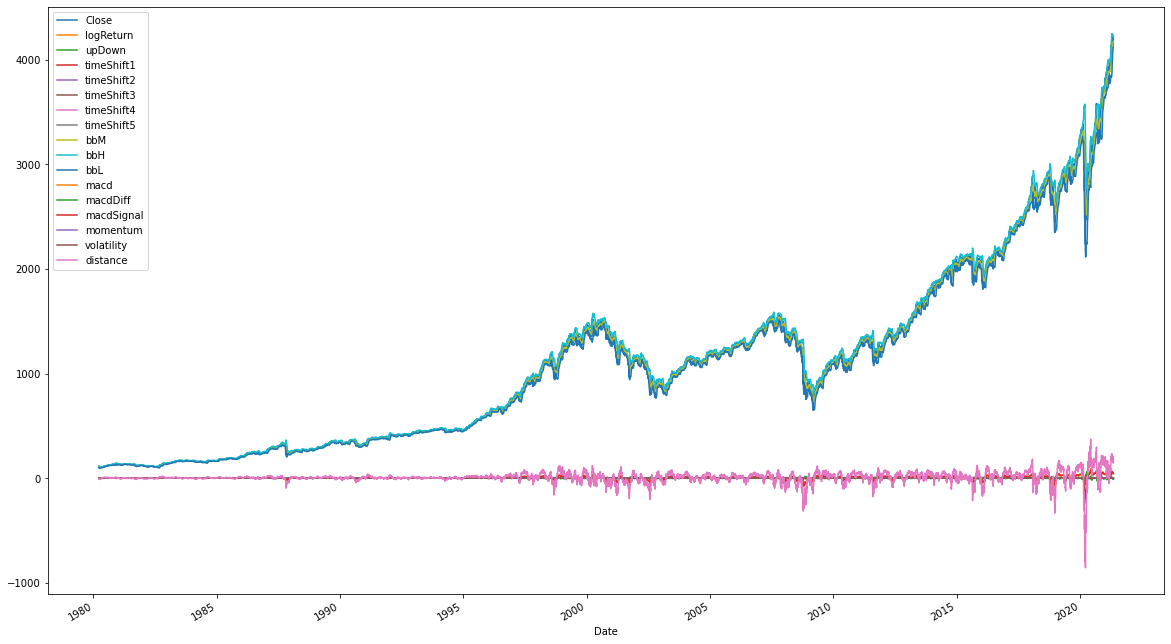

In [19]:
X.plot(figsize=(20, 12))

In [20]:
X.shape

(10374, 17)

<AxesSubplot:xlabel='Date'>

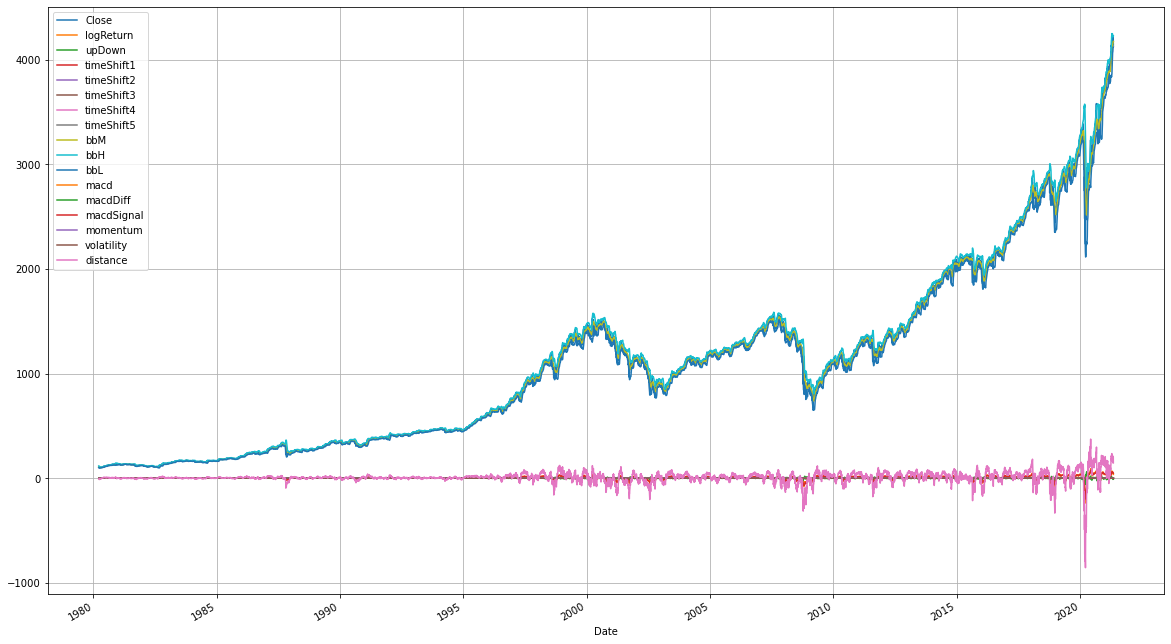

In [21]:
X.plot(figsize=(20, 12), grid=True)


In [22]:
import tensorflow as tf

from keras.models     import Sequential
from keras.layers     import Dense
from keras.optimizers import Adam

import random


In [23]:
optimizerAdam= Adam(learning_rate= 0.0001)

In [24]:
def set_seeds(seed= 100):
    
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)


In [25]:
metric= 'accuracy'

In [26]:
cols= list(X.columns)
cols

['Close',
 'logReturn',
 'upDown',
 'timeShift1',
 'timeShift2',
 'timeShift3',
 'timeShift4',
 'timeShift5',
 'bbM',
 'bbH',
 'bbL',
 'macd',
 'macdDiff',
 'macdSignal',
 'momentum',
 'volatility',
 'distance']

In [27]:
cols= cols[3:]
cols

['timeShift1',
 'timeShift2',
 'timeShift3',
 'timeShift4',
 'timeShift5',
 'bbM',
 'bbH',
 'bbL',
 'macd',
 'macdDiff',
 'macdSignal',
 'momentum',
 'volatility',
 'distance']

In [28]:
set_seeds()

model= Sequential()

model.add(
    Dense(64, 
          activation=  'relu',
          input_shape= (len(cols),)
         ))

model.add(
    Dense(64, 
          activation= 'relu'))

model.add(
    Dense(1, 
          activation= 'sigmoid')) #'tanh')) #'softmax')) #'sigmoid')) # <5>

model.compile(
    optimizer= optimizerAdam,
              loss=    'binary_crossentropy',
              metrics= [metric])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [29]:
cutoffDate= '2010-01-01'   #'2012-12-31'

In [30]:
X['upDown']= np.where(X['logReturn'] > 0, 1, 0)
X

<ipython-input-30-6103552264ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['upDown']= np.where(X['logReturn'] > 0, 1, 0)


,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5,bbM,bbH,bbL,macd,macdDiff,macdSignal,momentum,volatility,distance
Date,,,,,,,,,,,,,,,,,
1980-03-20,103.120003,-0.011474,0,0.002015,0.017833,-0.030529,-0.001801,-0.011765,108.935001,116.963942,100.906060,-2.726701,-0.624537,-2.102164,-0.004849,0.012175,-7.839203
1980-03-21,102.309998,-0.007886,0,-0.011474,0.002015,0.017833,-0.030529,-0.001801,108.298500,116.308949,100.288051,-2.830767,-0.582883,-2.247885,-0.004791,0.012203,-8.910598
1980-03-24,99.279999,-0.030063,0,-0.007886,-0.011474,0.002015,0.017833,-0.030529,107.596000,116.163190,99.028811,-3.121751,-0.699093,-2.422658,-0.006008,0.012184,-9.569003
1980-03-25,99.190002,-0.000907,0,-0.030063,-0.007886,-0.011474,0.002015,0.017833,106.856500,115.642305,98.070696,-3.321333,-0.718940,-2.602393,-0.005915,0.013203,-12.386202
1980-03-26,98.680000,-0.005155,0,-0.000907,-0.030063,-0.007886,-0.011474,0.002015,106.171500,115.259002,97.083999,-3.480535,-0.702514,-2.778021,-0.009663,0.012958,-12.252398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,4167.589844,0.000703,1,-0.006701,0.002744,-0.007221,0.006740,-0.000846,4161.897021,4219.042345,4104.751698,45.229450,-8.663370,53.892820,-0.001057,0.006222,150.440137
2021-05-06,4201.620117,0.008132,1,0.000703,-0.006701,0.002744,-0.007221,0.006740,4167.119531,4218.443550,4115.795513,44.480305,-7.530012,52.010317,-0.000747,0.006222,147.645430
2021-05-07,4232.600098,0.007346,1,0.008132,0.000703,-0.006701,0.002744,-0.007221,4172.309546,4227.899748,4116.719344,45.857808,-4.922007,50.779815,-0.000468,0.006386,176.151899


In [31]:
training_data= X[X.index < cutoffDate].copy()
training_data

,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5,bbM,bbH,bbL,macd,macdDiff,macdSignal,momentum,volatility,distance
Date,,,,,,,,,,,,,,,,,
1980-03-20,103.120003,-0.011474,0,0.002015,0.017833,-0.030529,-0.001801,-0.011765,108.935001,116.963942,100.906060,-2.726701,-0.624537,-2.102164,-0.004849,0.012175,-7.839203
1980-03-21,102.309998,-0.007886,0,-0.011474,0.002015,0.017833,-0.030529,-0.001801,108.298500,116.308949,100.288051,-2.830767,-0.582883,-2.247885,-0.004791,0.012203,-8.910598
1980-03-24,99.279999,-0.030063,0,-0.007886,-0.011474,0.002015,0.017833,-0.030529,107.596000,116.163190,99.028811,-3.121751,-0.699093,-2.422658,-0.006008,0.012184,-9.569003
1980-03-25,99.190002,-0.000907,0,-0.030063,-0.007886,-0.011474,0.002015,0.017833,106.856500,115.642305,98.070696,-3.321333,-0.718940,-2.602393,-0.005915,0.013203,-12.386202
1980-03-26,98.680000,-0.005155,0,-0.000907,-0.030063,-0.007886,-0.011474,0.002015,106.171500,115.259002,97.083999,-3.480535,-0.702514,-2.778021,-0.009663,0.012958,-12.252398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24,1126.479980,0.005242,1,0.002296,0.003557,0.010449,0.005813,-0.011881,1105.996497,1124.573478,1087.419515,7.553652,1.121634,6.432018,0.002047,0.007708,29.347161
2009-12-28,1127.780029,0.001153,1,0.005242,0.002296,0.003557,0.010449,0.005813,1107.810999,1127.426077,1088.195920,8.282221,1.480163,6.802058,0.005472,0.007729,34.547976
2009-12-29,1126.199951,-0.001402,0,0.001153,0.005242,0.002296,0.003557,0.010449,1109.339496,1129.670789,1089.008203,8.632608,1.464440,7.168168,0.004540,0.006451,35.223625


In [32]:
mu, std= training_data.mean(), training_data.std()
mu, std

(Close         683.001843
 logReturn       0.000315
 upDown          0.528739
 timeShift1      0.000317
 timeShift2      0.000319
 timeShift3      0.000315
 timeShift4      0.000315
 timeShift5      0.000313
 bbM           681.727057
 bbH           704.273666
 bbL           659.180447
 macd            0.923482
 macdDiff        0.005078
 macdSignal      0.918404
 momentum        0.000316
 volatility      0.009841
 distance        3.236098
 dtype: float64,
 Close         459.872147
 logReturn       0.011489
 upDown          0.499207
 timeShift1      0.011489
 timeShift2      0.011490
 timeShift3      0.011496
 timeShift4      0.011496
 timeShift5      0.011497
 bbM           459.788808
 bbH           475.607837
 bbL           444.578288
 macd            9.660557
 macdDiff        2.873273
 macdSignal      9.109741
 momentum        0.004855
 volatility      0.006057
 distance       34.416389
 dtype: float64)

In [33]:
#
# Data Normalization
#
training_data_ = (training_data - mu) / std
training_data_

,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5,bbM,bbH,bbL,macd,macdDiff,macdSignal,momentum,volatility,distance
Date,,,,,,,,,,,,,,,,,
1980-03-20,-1.260963,-1.026091,-1.059158,0.147832,1.524233,-2.683025,-0.184019,-1.050569,-1.245772,-1.234861,-1.255739,-0.377844,-0.219128,-0.331576,-1.063774,0.385331,-0.321803
1980-03-21,-1.262725,-0.713814,-1.059158,-1.026286,0.147605,1.523843,-2.682986,-0.183810,-1.247156,-1.236238,-1.257129,-0.388616,-0.204631,-0.347572,-1.051764,0.389905,-0.352933
1980-03-24,-1.269313,-2.644069,-1.059158,-0.713993,-1.026331,0.147872,1.523874,-2.682625,-1.248684,-1.236545,-1.259962,-0.418737,-0.245076,-0.366757,-1.302434,0.386872,-0.372064
1980-03-25,-1.269509,-0.106372,-1.059158,-2.644350,-0.714086,-1.025504,0.147906,1.523977,-1.250293,-1.237640,-1.262117,-0.439396,-0.251984,-0.386487,-1.283266,0.555014,-0.453920
1980-03-26,-1.270618,-0.476110,-1.059158,-0.106518,-2.644145,-0.713408,-1.025468,0.148094,-1.251782,-1.238446,-1.264336,-0.455876,-0.246267,-0.405766,-2.055210,0.514560,-0.450033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24,0.964351,0.428848,0.944021,0.172271,0.281800,0.881497,0.478256,-1.060617,0.922749,0.883711,0.963248,0.686313,0.388601,0.605244,0.356527,-0.352236,0.758681
2009-12-28,0.967178,0.072953,0.944021,0.428731,0.172040,0.282003,0.881530,0.478424,0.926695,0.889709,0.964994,0.761730,0.513382,0.645864,1.061866,-0.348715,0.909796
2009-12-29,0.963742,-0.149467,-1.059158,0.072816,0.428460,0.172295,0.282036,0.881673,0.930019,0.894428,0.966821,0.798000,0.507909,0.686053,0.869932,-0.559718,0.929427


In [34]:
test_data= X[X.index >= cutoffDate].copy()


In [35]:
# Data Normalization using training data's mu , std
test_data_= (test_data - mu) / std
test_data_


,Close,logReturn,upDown,timeShift1,timeShift2,timeShift3,timeShift4,timeShift5,bbM,bbH,bbL,macd,macdDiff,macdSignal,momentum,volatility,distance
Date,,,,,,,,,,,,,,,,,
2010-01-04,0.978507,1.357858,0.944021,-0.906743,-0.010773,-0.149388,0.072937,0.428797,0.936162,0.906502,0.966612,0.799107,0.290184,0.755898,-0.267343,-0.561333,0.508074
2010-01-05,0.986183,0.243321,0.944021,1.357790,-0.906807,-0.010431,-0.149353,0.073130,0.939483,0.914112,0.965340,0.872303,0.428676,0.789839,0.172325,-0.470976,0.997905
2010-01-06,0.987531,0.020030,0.944021,0.243194,1.357376,-0.906037,-0.010397,-0.149147,0.943169,0.920766,0.965844,0.923740,0.480942,0.827902,0.252954,-0.479547,1.075131
2010-01-07,0.997425,0.320122,0.944021,0.019891,0.242952,1.357065,-0.906001,-0.010199,0.948579,0.926141,0.971285,0.989995,0.562609,0.872404,0.333171,-0.488655,1.059708
2010-01-08,1.004580,0.223020,0.944021,0.319999,0.019684,0.243173,1.357097,-0.905748,0.953911,0.932334,0.975688,1.056700,0.629155,0.922153,0.489610,-0.583343,1.148477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,7.577297,0.033769,0.944021,-0.610826,0.211055,-0.655538,0.558901,-0.100774,7.569062,7.390056,7.750201,4.586275,-3.016925,5.815140,-0.282656,-0.597565,4.277149
2021-05-06,7.651297,0.680377,0.944021,0.033630,-0.610936,0.211292,-0.655502,0.559063,7.580420,7.388797,7.775042,4.508728,-2.622476,5.608492,-0.218845,-0.597572,4.195947
2021-05-07,7.718663,0.611965,0.944021,0.680273,0.033421,-0.610307,0.211325,-0.655265,7.591708,7.408680,7.777120,4.651318,-1.714799,5.473417,-0.161496,-0.570488,5.024228


In [36]:
cols, training_data[training_data['upDown']==1].count(), training_data[training_data['upDown']==0].count() 


(['timeShift1',
  'timeShift2',
  'timeShift3',
  'timeShift4',
  'timeShift5',
  'bbM',
  'bbH',
  'bbL',
  'macd',
  'macdDiff',
  'macdSignal',
  'momentum',
  'volatility',
  'distance'],
 Close         3974
 logReturn     3974
 upDown        3974
 timeShift1    3974
 timeShift2    3974
 timeShift3    3974
 timeShift4    3974
 timeShift5    3974
 bbM           3974
 bbH           3974
 bbL           3974
 macd          3974
 macdDiff      3974
 macdSignal    3974
 momentum      3974
 volatility    3974
 distance      3974
 dtype: int64,
 Close         3542
 logReturn     3542
 upDown        3542
 timeShift1    3542
 timeShift2    3542
 timeShift3    3542
 timeShift4    3542
 timeShift5    3542
 bbM           3542
 bbH           3542
 bbL           3542
 macd          3542
 macdDiff      3542
 macdSignal    3542
 momentum      3542
 volatility    3542
 distance      3542
 dtype: int64)

In [37]:

cols
test_data[test_data['upDown']==1].count(), test_data[test_data['upDown']==0].count() 


(Close         1574
 logReturn     1574
 upDown        1574
 timeShift1    1574
 timeShift2    1574
 timeShift3    1574
 timeShift4    1574
 timeShift5    1574
 bbM           1574
 bbH           1574
 bbL           1574
 macd          1574
 macdDiff      1574
 macdSignal    1574
 momentum      1574
 volatility    1574
 distance      1574
 dtype: int64,
 Close         1284
 logReturn     1284
 upDown        1284
 timeShift1    1284
 timeShift2    1284
 timeShift3    1284
 timeShift4    1284
 timeShift5    1284
 bbM           1284
 bbH           1284
 bbL           1284
 macd          1284
 macdDiff      1284
 macdSignal    1284
 momentum      1284
 volatility    1284
 distance      1284
 dtype: int64)

In [38]:

%%time

model.fit(training_data[cols],
          training_data['upDown'], # used as the label for supervised learning
          epochs=  100, #50, 
          verbose= False,
          validation_split= 0.2, 
          shuffle= False
         )
#
# Wall time: 2min 25s @ myHomePC without using GPU
#

Wall time: 14.6 s


In [39]:
res= pd.DataFrame(model.history.history)
res

,loss,accuracy,val_loss,val_accuracy
0,3.219918,0.504491,1.348682,0.545878
1,0.909460,0.503659,2.055367,0.542553
2,0.792067,0.502162,0.906312,0.536569
3,0.745727,0.504158,0.785286,0.490027
4,0.730274,0.501996,0.770408,0.472074
...,...,...,...,...
95,0.674569,0.596973,0.656012,0.635638
96,0.675017,0.596640,0.658773,0.628989
97,0.674694,0.596640,0.663803,0.626330
98,0.675431,0.597971,0.658587,0.634973


In [40]:
res.head()

,loss,accuracy,val_loss,val_accuracy
0,3.219918,0.504491,1.348682,0.545878
1,0.909460,0.503659,2.055367,0.542553
2,0.792067,0.502162,0.906312,0.536569
3,0.745727,0.504158,0.785286,0.490027
4,0.730274,0.501996,0.770408,0.472074


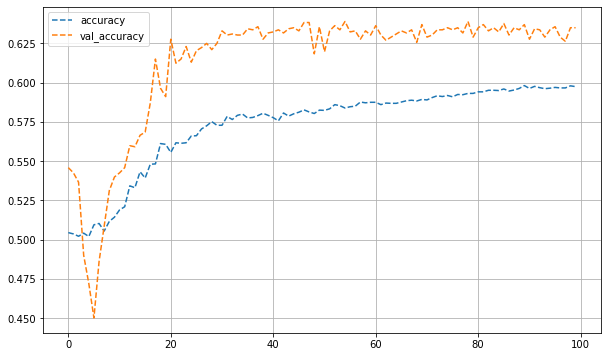

In [41]:
res[[metric, 'val_' + metric]].plot(figsize=(10, 6), style='--', grid=True);

In [42]:
model.evaluate(training_data_[cols], training_data['upDown'])

235/235 [==============================] - 0s 733us/step - loss: 0.7552 - accuracy: 0.4997


[0.7552054524421692, 0.49973389506340027]

In [43]:
pred= np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [44]:
pred[:30].flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [45]:
training_data['prediction']= np.where(pred > 0, 1, -1)

In [46]:
training_data['strategy'] = (training_data['prediction'] *
                            training_data['logReturn'])

In [47]:
training_data[['logReturn', 'strategy']].sum().apply(np.exp)

logReturn    10.690250
strategy      5.101557
dtype: float64

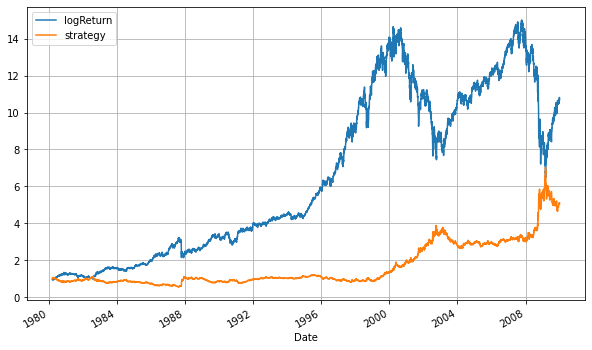

In [48]:
training_data[['logReturn', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6), grid=True);

In [49]:
model.evaluate(test_data_[cols], test_data['upDown'])

90/90 [==============================] - 0s 717us/step - loss: 0.8134 - accuracy: 0.4839


[0.8133604526519775, 0.4839048385620117]

In [50]:
cols

['timeShift1',
 'timeShift2',
 'timeShift3',
 'timeShift4',
 'timeShift5',
 'bbM',
 'bbH',
 'bbL',
 'macd',
 'macdDiff',
 'macdSignal',
 'momentum',
 'volatility',
 'distance']

In [51]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

In [52]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [53]:
test_data['prediction'].value_counts()

-1    2129
 1     729
Name: prediction, dtype: int64

In [54]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['logReturn'])

In [55]:
test_data[['logReturn', 'strategy']].sum().apply(np.exp)

logReturn    3.712914
strategy     1.851752
dtype: float64

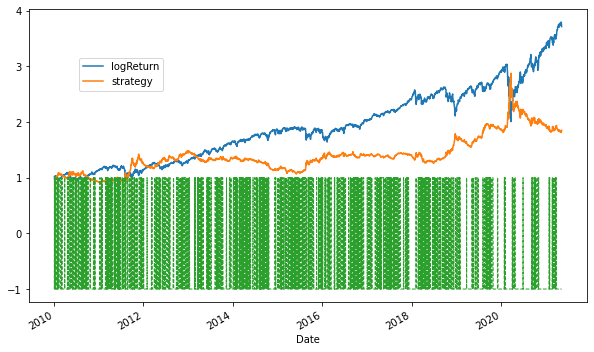

In [56]:
ax = test_data[['logReturn', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
test_data['prediction'].plot(ax = ax, lw=1, secondary_y = 'Position', style = '--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85));

In [57]:
X[X.index >= cutoffDate]['upDown']

Date
2010-01-04    1
2010-01-05    1
2010-01-06    1
2010-01-07    1
2010-01-08    1
             ..
2021-05-05    1
2021-05-06    1
2021-05-07    1
2021-05-10    0
2021-05-11    0
Name: upDown, Length: 2858, dtype: int32

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

report= classification_report(X[X.index >= cutoffDate]['upDown'], pred)
print(report)
print("Confusion Matrix")
print(X[X.index >= cutoffDate]['upDown'], pred)

print('')
print("Accuracy")
print(accuracy_score(X[X.index >= cutoffDate]['upDown'], pred))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57      1284
           1       0.57      0.26      0.36      1574

    accuracy                           0.48      2858
   macro avg       0.51      0.51      0.46      2858
weighted avg       0.52      0.48      0.45      2858

Confusion Matrix
Date
2010-01-04    1
2010-01-05    1
2010-01-06    1
2010-01-07    1
2010-01-08    1
             ..
2021-05-05    1
2021-05-06    1
2021-05-07    1
2021-05-10    0
2021-05-11    0
Name: upDown, Length: 2858, dtype: int32 [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]

Accuracy
0.4839048285514346


In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc


In [60]:
y_pred_keras= pred.ravel()

fpr_keras, tpr_keras, thresholds_keras= roc_curve(
    test_data['upDown'], 
    y_pred_keras)

auc_keras= auc(fpr_keras, tpr_keras)

fpr_keras, tpr_keras, thresholds_keras, auc_keras

(array([0.       , 0.2453271, 1.       ]),
 array([0.        , 0.26302414, 1.        ]),
 array([2, 1, 0]),
 0.5088485197544206)

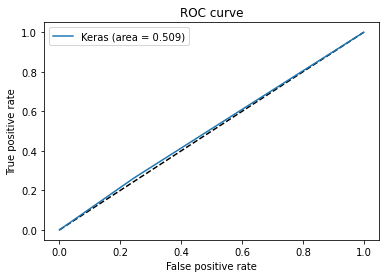

In [61]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [62]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda3-2020.11\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Start date,2013-01-02
End date,2021-05-11
Total months,100
,Backtest
Annual return,1.6%
Cumulative returns,14.0%
Annual volatility,17.1%
Sharpe ratio,0.18
Calmar ratio,0.04
Stability,0.53
Max drawdown,-38.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.95,2020-03-23,2021-05-07,NaT,NaN
1,29.00,2013-01-08,2015-06-04,2018-12-07,1544
2,13.63,2018-12-24,2019-05-03,2019-08-05,161
3,8.88,2020-03-12,2020-03-13,2020-03-16,3
4,7.95,2019-09-09,2020-01-17,2020-02-24,121


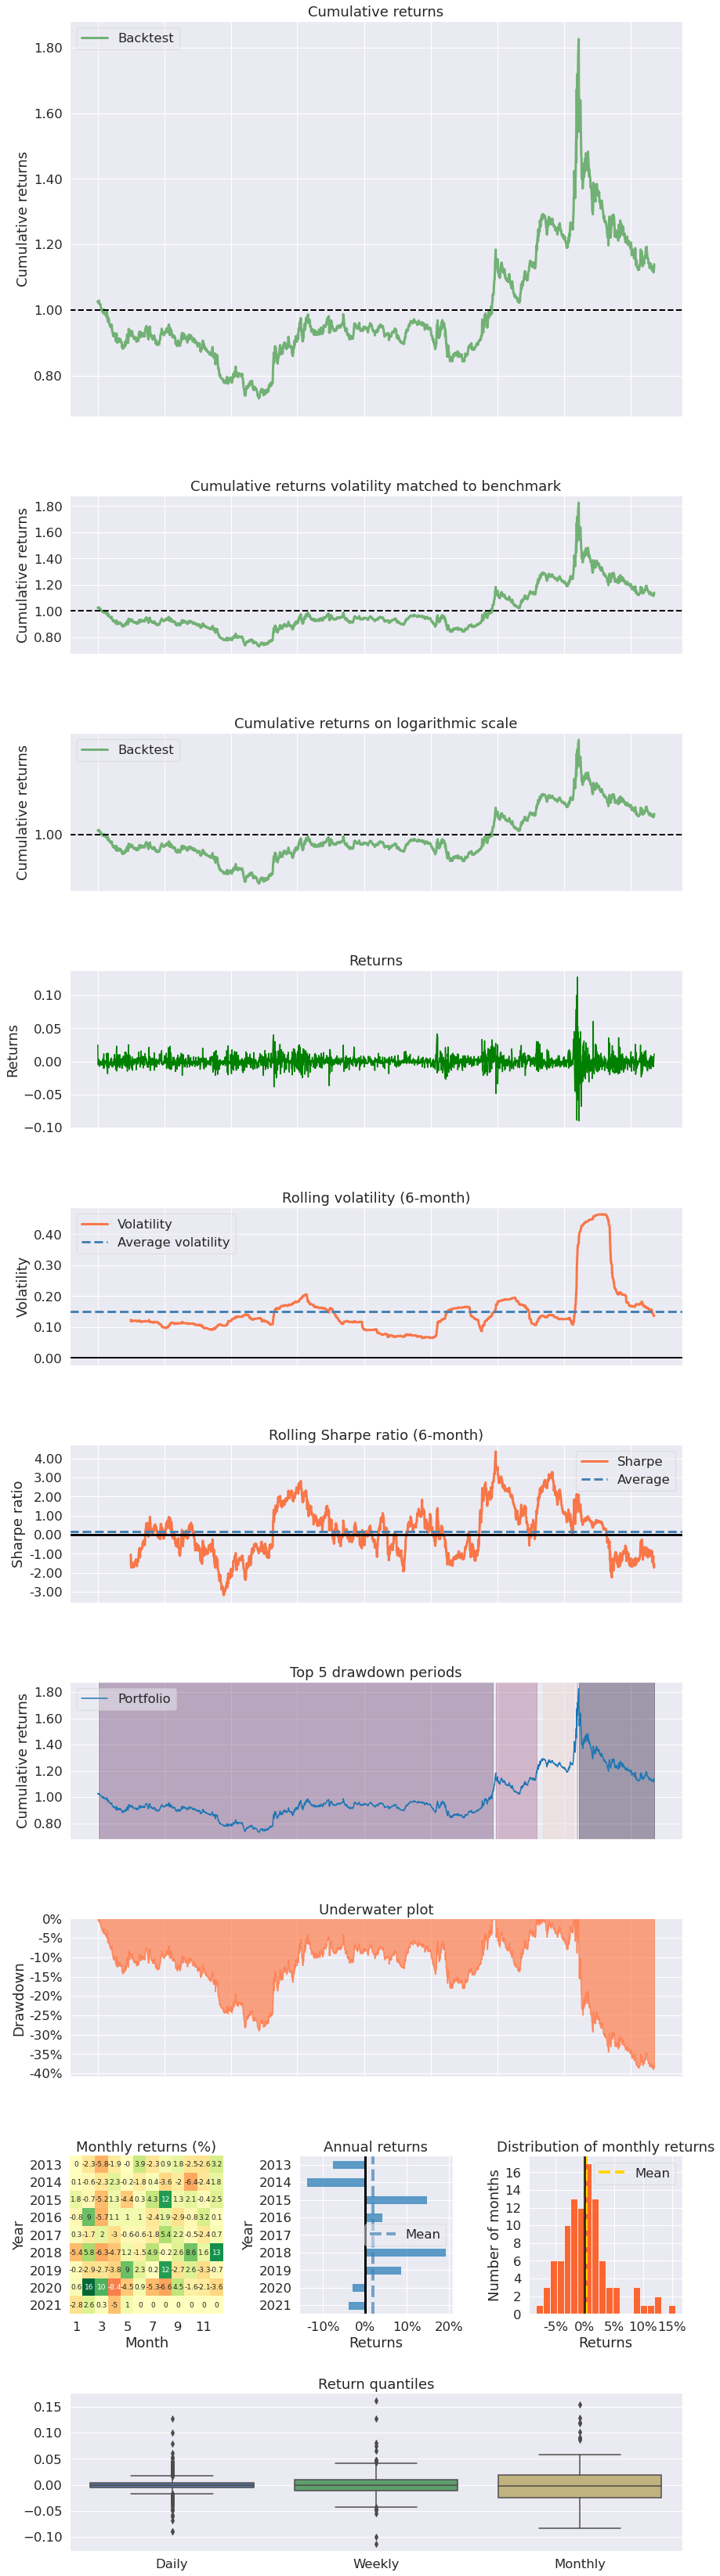

In [63]:
meta_returns= test_data['strategy'].loc['20130102':]

pf.create_returns_tear_sheet(meta_returns, 
                             benchmark_rets= None)

In [64]:
# https://github.com/quantopian/pyfolio/issues/652#issuecomment-711052779
